In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
mpl.rc('font', family = 'Malgun Gothic')

In [2]:
df_TOCC = pd.read_csv('../../datasets/TypeOfContractChannel.csv')
df_TOCC[:2]

,id,type_of_contract,type_of_contract2,channel,datetime,Term,payment_type,product,amount,state,overdue_count,overdue,credit rating,bank,cancellation,age,Mileage
0,66758234,렌탈,Normal,서비스 방문,2019-10-20,60,CMS,K1,96900,계약확정,0,없음,9.0,새마을금고,정상,43.0,1862.0
1,66755948,렌탈,Extension_Rental,서비스 방문,2019-10-20,60,카드이체,K1,102900,계약확정,0,없음,2.0,현대카드,정상,62.0,2532.0


### x: 범주형, y: 연속형 : 범주형에 따른 상관관계 확인

### 선정 변수: channel(항목2), amount(비정규분포) - Wilcoxon Test
- 분석 내용: channel 중 서비스방문과 홈쇼핑에 따른 월 렌탈 비용 평균이 차이가 있는가
    - 귀무가설: 비용 평균에 차이가 없다.
    - 대립가설: 비용 평균에 차이가 있다.
- 분석 결론 (기준: p-value가 0.05)
    - 통계 결론: p-value=0.0, 즉 대립가설이 참
    - 사실 결론: 비용 평균에 차이가 있다.

<Axes: xlabel='channel', ylabel='count'>

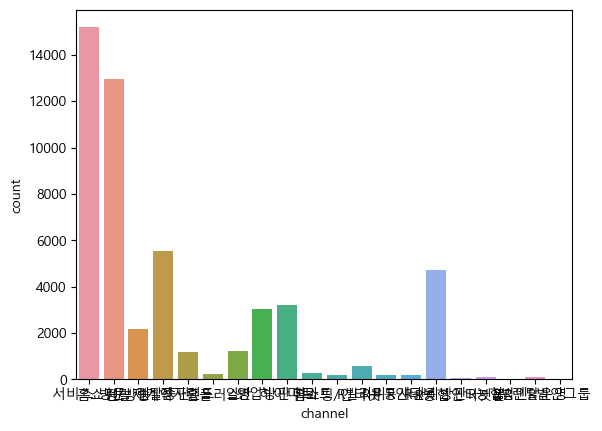

In [6]:
sns.countplot(data=df_TOCC, x='channel')

In [10]:
df_TOCC['channel'].value_counts()

서비스 방문     15186
홈쇼핑/방송     12977
렌탈총판        5544
R관리방판       4727
하이마트        3227
영업방판        3039
렌탈재계약       2193
일반          1232
전자랜드        1205
R빌리미         560
이마트          265
홈플러스         225
R인터넷         198
R유통사         188
홈쇼핑/인터넷      177
R렌탈운영        120
R농협          119
R농협인터넷몰       83
R법인그룹         20
R법인           19
Name: channel, dtype: int64

In [20]:
# 검증 대상 항목만 필터링 & 추출
condition = (df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송')
df_channel_amount = df_TOCC[condition][['channel', 'amount']]
df_channel_amount[:2]

,channel,amount
0,서비스 방문,96900
1,서비스 방문,102900


In [22]:
# null 값 확인
df_channel_amount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28163 entries, 0 to 51301
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   channel  28163 non-null  object
 1   amount   28163 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 660.1+ KB


### 정규성 분포 확인
- 5천 건 이하의 경우 shapira test를 통해 정규성 검증
- 5천 건 이상의 경우 anderson test를 통해 정규성 검증

In [28]:
stats.anderson(df_channel_amount['amount'])

AndersonResult(statistic=1292.5765966678264, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=94187.21940134218, scale=10213.602310960658)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [29]:
# s값이 cv보다 매우 높으므로 비정규분포이다.
# 비정규분포의 경우 비모수적검정
# 2집단 비교의 경우 Wilcoxon Test, 3집단 이상의 경우 Kruskal Test

### 범주형 항목 따라 검증: 2개 항목(Wilcoxon Test)

In [34]:
df_channel_amount['channel'].value_counts()

서비스 방문    15186
홈쇼핑/방송    12977
Name: channel, dtype: int64

In [42]:
condition = (df_TOCC['channel'] == '서비스 방문') | (df_TOCC['channel'] == '홈쇼핑/방송')
df_service = df_channel_amount[df_channel_amount['channel'] == '서비스 방문']
df_homeshopping = df_channel_amount[df_channel_amount['channel'] == '홈쇼핑/방송']

In [45]:
df_service[:2]

,channel,amount
0,서비스 방문,96900
1,서비스 방문,102900


In [46]:
df_homeshopping[:2]

,channel,amount
2,홈쇼핑/방송,96900
6,홈쇼핑/방송,98400


In [47]:
## 검증
stats.ranksums(df_service['amount'], df_homeshopping['amount'])

RanksumsResult(statistic=74.731078009603, pvalue=0.0)